# Principal component analysis of features (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used in the field of machine learning and statistics. The main goal of PCA is to transform high-dimensional data into a lower-dimensional representation, capturing as much of the original variability as possible. This is achieved by finding the principal components of the data.

In [103]:
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from araus_utils import SOM, assign_clusters, assign_folds, plot_pca_heatmap

normalise = lambda X: (X-np.mean(X,axis=0,keepdims=True))/np.std(X,axis=0,keepdims=True) # Normalise an (n,p) numpy array to mean 0, variance 1.

### Load data file for soundscapes

Extract relevant data (features)

In [104]:
responses = pd.read_csv(os.path.join('..','data','responses_complete.csv'), dtype = {'participant':str})

In [105]:
relevant_columns = ['Savg_r','Smax_r','S05_r','S10_r','S20_r','S30_r','S40_r','S50_r','S60_r','S70_r','S80_r','S90_r','S95_r',
                         'Navg_r','Nrmc_r','Nmax_r','N05_r','N10_r','N20_r','N30_r','N40_r','N50_r','N60_r','N70_r','N80_r','N90_r','N95_r',
                         'Favg_r','Fmax_r','F05_r','F10_r','F20_r','F30_r','F40_r','F50_r','F60_r','F70_r','F80_r','F90_r','F95_r',
                         'LAavg_r','LAmin_r','LAmax_r','LA05_r','LA10_r','LA20_r','LA30_r','LA40_r','LA50_r','LA60_r','LA70_r','LA80_r','LA90_r','LA95_r',
                         'LCavg_r','LCmin_r','LCmax_r','LC05_r','LC10_r','LC20_r','LC30_r','LC40_r','LC50_r','LC60_r','LC70_r','LC80_r','LC90_r','LC95_r',
                         'Ravg_r','Rmax_r','R05_r','R10_r','R20_r','R30_r','R40_r','R50_r','R60_r','R70_r','R80_r','R90_r','R95_r',
                         'Tgavg_r','Tavg_r','Tmax_r','T05_r','T10_r','T20_r','T30_r','T40_r','T50_r','T60_r','T70_r','T80_r','T90_r','T95_r',
                         'M00005_0_r','M00006_3_r','M00008_0_r','M00010_0_r','M00012_5_r','M00016_0_r','M00020_0_r','M00025_0_r','M00031_5_r','M00040_0_r',
                         'M00050_0_r','M00063_0_r','M00080_0_r','M00100_0_r','M00125_0_r','M00160_0_r','M00200_0_r','M00250_0_r','M00315_0_r','M00400_0_r',
                         'M00500_0_r','M00630_0_r','M00800_0_r','M01000_0_r','M01250_0_r','M01600_0_r','M02000_0_r','M02500_0_r','M03150_0_r','M04000_0_r',
                         'M05000_0_r','M06300_0_r','M08000_0_r','M10000_0_r','M12500_0_r','M16000_0_r','M20000_0_r', 'masker_bird' , 'masker_construction',  
                         'masker_silence',  'masker_traffic','masker_water',  'masker_wind']

(27255, 138)


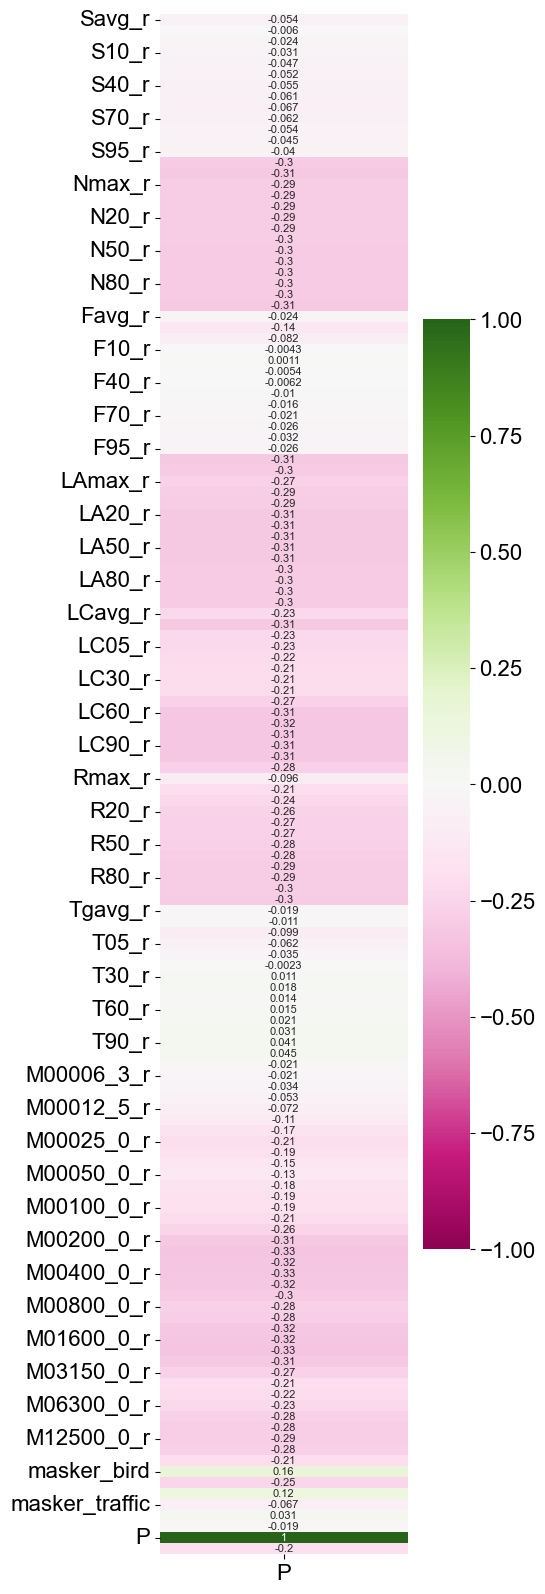

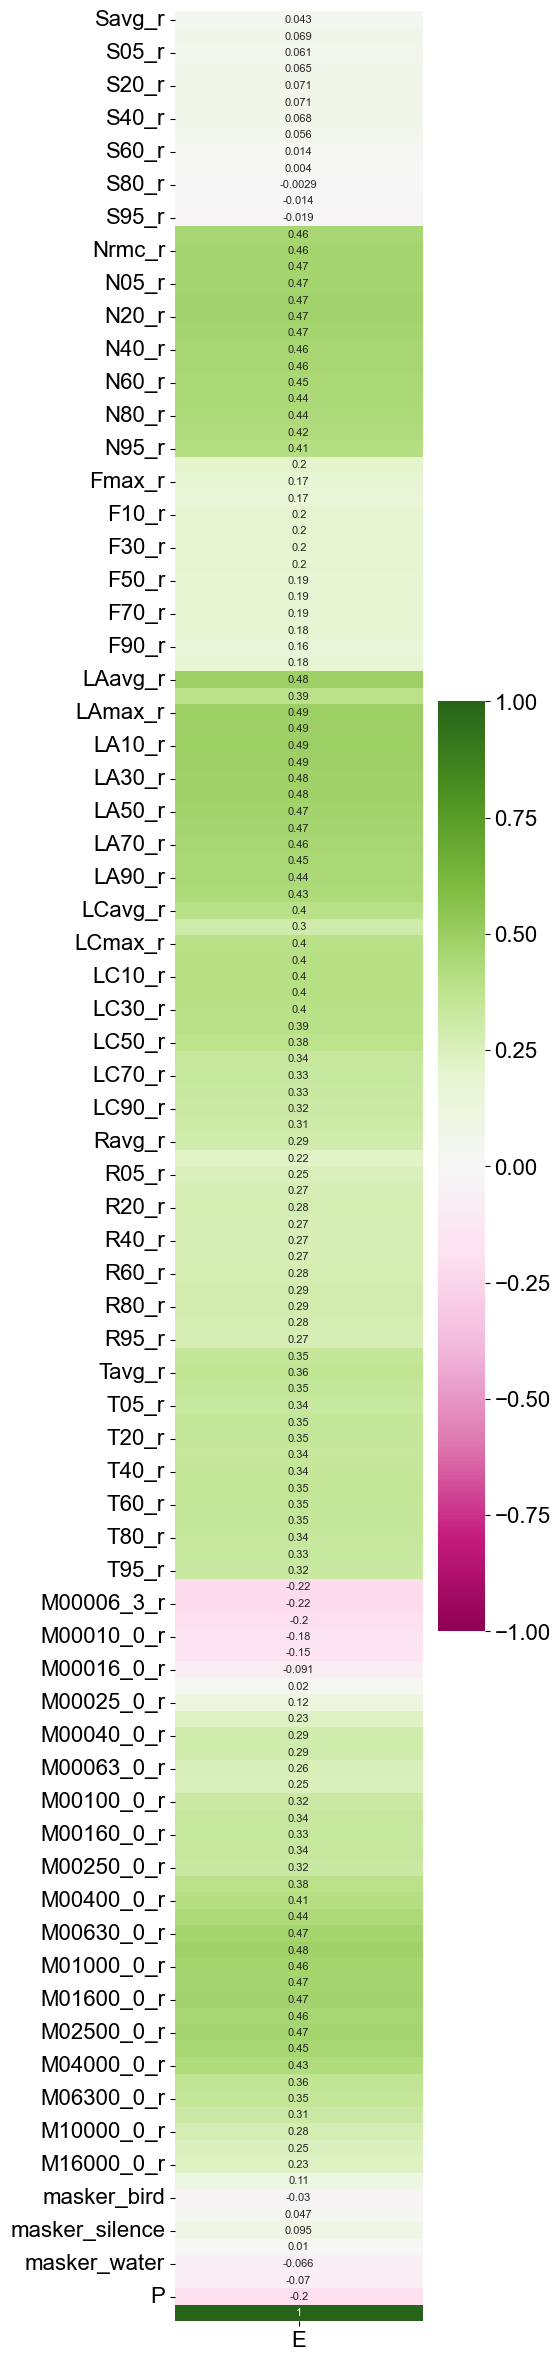

" \nsns.heatmap(data.corr().loc[['M00250_0_r', 'M00315_0_r', 'M00400_0_r', 'M01600_0_r','M02000_0_r'], ['M00250_0_r', 'M00315_0_r', 'M00400_0_r', 'M01600_0_r','M02000_0_r']], annot=True, cmap=plt.cm.Reds)\nplt.show() "

In [191]:
def normalize_min_max(X):
    min_vals = np.min(X, axis=0, keepdims=True)
    max_vals = np.max(X, axis=0, keepdims=True)
    normalized = -1 + 2 * (X - min_vals) / (max_vals - min_vals)
    return normalized


import seaborn as sns
X=responses[relevant_columns].values #Features
print(X.shape)
Y_p=responses["P_ground_truth"].values
Y_e=responses["E_ground_truth"].values

X_norm=normalize_min_max(X)
Y_p_norm=normalize_min_max(Y_p)
Y_e_norm=normalize_min_max(Y_e)



data = pd.DataFrame(X_norm, columns=relevant_columns)
data['P'] = Y_p_norm
data['E'] = Y_e_norm
# compute pearson's r
target_correlation_P = data.corr()[['P']]
target_correlation_E = data.corr()[['E']]
# we only care about the target variable
plt.figure(figsize=(4,20))
font_size=8
sns.heatmap(target_correlation_P, annot=True, cmap="PiYG", vmin=-1, vmax=1,center=0,annot_kws={"fontsize": font_size})
plt.show()
plt.figure(figsize=(4,30))
sns.heatmap(target_correlation_E, annot=True, cmap="PiYG", vmin=-1, vmax=1,center=0,annot_kws={"fontsize": font_size})
plt.show()

# extract the most correlated features with the output variable
aux= target_correlation_P[abs(target_correlation_P)>0.33].dropna()

""" 
sns.heatmap(data.corr().loc[['M00250_0_r', 'M00315_0_r', 'M00400_0_r', 'M01600_0_r','M02000_0_r'], ['M00250_0_r', 'M00315_0_r', 'M00400_0_r', 'M01600_0_r','M02000_0_r']], annot=True, cmap=plt.cm.Reds)
plt.show() """



Normalise the feature matrix

In [107]:
Xs=features.values
feature_names=features.columns
print(feature_names)
print(Xs.shape)
print(Xs)

Index(['Savg_r', 'Smax_r', 'S05_r', 'S10_r', 'S20_r', 'S30_r', 'S40_r',
       'S50_r', 'S60_r', 'S70_r',
       ...
       'M10000_0_r', 'M12500_0_r', 'M16000_0_r', 'M20000_0_r', 'masker_bird',
       'masker_construction', 'masker_silence', 'masker_traffic',
       'masker_water', 'masker_wind'],
      dtype='object', length=138)
(27255, 138)
[[1.37 1.97 1.69 ... 0.   0.   0.  ]
 [1.68 1.97 1.87 ... 0.   0.   0.  ]
 [2.23 2.36 2.29 ... 0.   1.   0.  ]
 ...
 [1.23 1.56 1.43 ... 0.   0.   0.  ]
 [1.29 1.57 1.47 ... 0.   0.   0.  ]
 [1.37 1.97 1.69 ... 0.   0.   0.  ]]


In [108]:
Xs_norm  = normalise(Xs)
print(Xs_norm.shape)
print(Xs_norm)

(27255, 138)
[[-0.1163838   0.27868504  0.22859882 ... -0.42861796 -0.43041569
  -0.42861796]
 [ 1.16068473  0.27868504  0.81183485 ... -0.42861796 -0.43041569
  -0.42861796]
 [ 3.42645147  1.34137396  2.17271891 ... -0.42861796  2.32333539
  -0.42861796]
 ...
 [-0.69312443 -0.83850074 -0.61385321 ... -0.42861796 -0.43041569
  -0.42861796]
 [-0.44594987 -0.81125231 -0.48424521 ... -0.42861796 -0.43041569
  -0.42861796]
 [-0.1163838   0.27868504  0.22859882 ... -0.42861796 -0.43041569
  -0.42861796]]


### Perform PCA
Perform PCA on the normalised feature matrix. We use `sklearn.decomposition.PCA` to perform the PCA via singular value decomposition of the sample covariance matrix, and get the following outputs of the PCA:
- `Us` : The principal components matrix
- `Ls_norm` : Percentages of variance explained by each eigenvalue, in decreasing order
- `Ys` : The PCA-transformed data matrix


In [109]:
Xs_PCA = sklearn.decomposition.PCA().fit(Xs_norm)
Us, Ls_norm, Ys= Xs_PCA.components_, Xs_PCA.explained_variance_ratio_, Xs_PCA.transform(Xs_norm)


print(Us.shape, Ls_norm.shape, Ys.shape)

aux=0
for i in range(Ys.shape[1]):
    for j in range(Xs.shape[1]):
        columnY=Ys[:,i]
        columnX=Xs[:,j]
        if(np.all(columnY== columnX)):
            aux=+1

print(aux)

(138, 138) (138,) (27255, 138)
0


In [110]:
aux=np.sum(Us, axis=1)
print(normalise(aux))
print(Ls_norm)

[ 9.91567435e+00  2.30418866e+00  2.01281648e+00  1.51782662e+00
 -3.17673483e+00  2.27188752e+00 -1.23818812e+00 -1.33580722e-01
 -1.06332538e-01  3.03006395e-01 -1.78815643e-01 -3.28613502e-01
  2.71982234e-01  1.99789277e-01  6.29657619e-01 -1.50938181e-01
 -8.02930817e-03  7.33383098e-01 -1.58436425e-02 -2.67586014e-01
 -4.04078200e-01  1.10654887e-01  3.63662228e-01  2.07794339e-01
  1.53144396e-02 -6.05617310e-01  1.13252199e-02 -4.80240187e-02
  2.84277528e-01 -2.83786980e-01  2.13262687e-01  5.00452421e-02
 -4.08240676e-01 -1.51883266e-01 -2.21993454e-01 -4.68804236e-01
 -2.15064860e-01 -1.22351268e-01 -6.07507457e-02  2.09357490e-02
  1.68459569e-01 -4.52593901e-02 -3.90200549e-02 -1.14992931e-01
  1.38408575e-01 -6.85516797e-02 -1.18525174e-01  1.94136326e-01
 -7.35004530e-02 -4.20447911e-02 -4.56463774e-01  2.38929857e-02
  1.14098445e-01 -1.53824853e-01  1.33663657e-02 -3.06256779e-02
 -1.80623326e-01 -1.40225588e-01 -1.80503372e-01 -8.38636945e-02
 -4.07311684e-02 -3.50284

Calculate the number of components to keep to explain at least `desired_explained_variance` of the total variance. For the generation of the dataset, we want the components to explain at least 90% of the variance.

In [53]:
n_components = np.sum(np.cumsum(Ls_norm) < 0.96)

print(f'To keep first {n_components} components if we want to explain 95% of the variance.')

To keep first 18 components if we want to explain 95% of the variance.


Extract out first `n_components` principal components (i.e. those that explain 90% of the variance) as a truncated PCA-transformed data matrix `Ys`. These will be used for SOM clustering later.

In [36]:
Ys = Ys[:n_components,:]
print(Ys.shape)
print(Ys)

(16, 138)
[[ 1.55454222e+01 -3.13846411e+00  6.20446862e+00 ... -9.94216542e-05
   1.00908352e-06  2.51923984e-17]
 [-5.96246570e+00  3.23517326e+00  5.74870506e-01 ... -3.83717202e-04
   1.05540665e-04 -3.07874509e-16]
 [ 2.73516524e+00  1.43088858e+01  1.03613830e+00 ... -7.17360963e-03
   1.95409883e-04 -2.56317720e-18]
 ...
 [-1.17757117e+01  9.74927213e+00  2.50471614e+00 ... -3.02650646e-03
   1.07101017e-04 -2.38024211e-15]
 [-1.24430704e+01 -5.14921880e+00 -2.51919478e-01 ... -4.92879654e-04
   1.84452381e-04 -1.96852207e-16]
 [ 7.78421218e+00  3.60421789e+00 -3.15629412e+00 ...  2.32074943e-04
   1.38442143e-04  2.21788287e-15]]


In [102]:
# Assuming Us is your principal component matrix
top_features_pc1 = np.argsort(np.abs(Us[:, 0]))[::-1][:20]

print("Top 20 features for PC1:", top_features_pc1)
feature_names_pc1 = features.columns[top_features_pc1]
print("Feature names for PC1:", feature_names_pc1)

Top 20 features for PC1: [1 0 2]
Feature names for PC1: Index(['Smax_r', 'Savg_r', 'S05_r'], dtype='object')


In [73]:
from sklearn.feature_selection import f_regression, SelectKBest

Y_train=responses["P_ground_truth"]
X_train=pd.DataFrame(Xs,columns=feature_names)

# Assuming X_train and Y_train are your training data
k_best_selector = SelectKBest(f_regression, k=80)
X_train_selected = k_best_selector.fit_transform(X_train, Y_train)

# Get the indices of the selected features
top_features_indices = k_best_selector.get_support(indices=True)
top_features = X_train.columns[top_features_indices]

print("Top 20 features:", top_features)

Top 20 features: Index(['Navg_r', 'Nrmc_r', 'Nmax_r', 'N05_r', 'N10_r', 'N20_r', 'N30_r',
       'N40_r', 'N50_r', 'N60_r', 'N70_r', 'N80_r', 'N90_r', 'N95_r',
       'LAavg_r', 'LAmin_r', 'LAmax_r', 'LA05_r', 'LA10_r', 'LA20_r', 'LA30_r',
       'LA40_r', 'LA50_r', 'LA60_r', 'LA70_r', 'LA80_r', 'LA90_r', 'LA95_r',
       'LCavg_r', 'LCmin_r', 'LCmax_r', 'LC05_r', 'LC10_r', 'LC20_r', 'LC30_r',
       'LC40_r', 'LC50_r', 'LC60_r', 'LC70_r', 'LC80_r', 'LC90_r', 'LC95_r',
       'Ravg_r', 'R05_r', 'R10_r', 'R20_r', 'R30_r', 'R40_r', 'R50_r', 'R60_r',
       'R70_r', 'R80_r', 'R90_r', 'R95_r', 'M00025_0_r', 'M00100_0_r',
       'M00125_0_r', 'M00160_0_r', 'M00200_0_r', 'M00250_0_r', 'M00315_0_r',
       'M00400_0_r', 'M00500_0_r', 'M00630_0_r', 'M00800_0_r', 'M01000_0_r',
       'M01250_0_r', 'M01600_0_r', 'M02000_0_r', 'M02500_0_r', 'M03150_0_r',
       'M04000_0_r', 'M05000_0_r', 'M06300_0_r', 'M08000_0_r', 'M10000_0_r',
       'M12500_0_r', 'M16000_0_r', 'M20000_0_r', 'masker_constructi

In [100]:
# prueba

array = np.array([[1, 2, 3,3], [4, 5, 6,6], [7, 8, 9,7], [10, 11, 12,12],[13, 14, 15,16]])
#print(array.shape,array)
columns=["col0", "col1", "col2", "output"]
df=pd.DataFrame(array,columns=columns)
#print(df)
X_train=df[["col0", "col1", "col2"]]
Y_train=df["output"]
#print(X_train)
#print(Y_train)
Xs=X_train.values
Xs_norm=normalise(Xs)
#print(Xs)
#print(Xs_norm)
#print(np.mean(Xs_norm), np.std(Xs_norm))

Xs_PCA = sklearn.decomposition.PCA().fit(Xs_norm)
Us, Ls_norm, Ys= Xs_PCA.components_, Xs_PCA.explained_variance_ratio_, Xs_PCA.transform(Xs_norm)
print(Us.shape, Ls_norm.shape, Ys.shape)
print(Us)
#print(np.sum(Us, axis=0))
#print((np.sum(Us, axis=1))/np.sum(np.sum(Us, axis=1)))
print(Ys)
print(Ls_norm)
#print(Xs/Ys)
#print(Xs_norm/sum(abs(Xs_norm)))


(3, 3) (3,) (5, 3)
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.81649658 -0.40824829 -0.40824829]
 [-0.          0.70710678 -0.70710678]]
[[ 2.44948974e+00 -4.94442302e-16  1.36716173e-16]
 [ 1.22474487e+00 -2.47221151e-16  6.83580866e-17]
 [-7.69185075e-17  1.99477081e-32 -4.20834313e-33]
 [-1.22474487e+00  2.47221151e-16 -6.83580866e-17]
 [-2.44948974e+00  4.94442302e-16 -1.36716173e-16]]
[1.00000000e+00 3.63472536e-33 2.02578990e-64]
